In [1]:
import torch
import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')

plt.style.use('fivethirtyeight')

# Linear regression with PyTorch

In [3]:
# Generate some data
n=100   
x=torch.ones(n, 2)

In [4]:
x[:,0].uniform_(-1.,1)      # In torch funcs with "_" means: do not return, replace!
x[:5]

tensor([[-0.5977,  1.0000],
        [ 0.6009,  1.0000],
        [ 0.2694,  1.0000],
        [-0.7287,  1.0000],
        [ 0.3354,  1.0000]])

In [5]:
a = torch.tensor([3.,2])

In [6]:
y = x@a + torch.rand(n)

* #### Introducing @ torch operator:

In [7]:
u = torch.tensor([2,3])
u@u

tensor(13)

Cool! Isn't it? :)

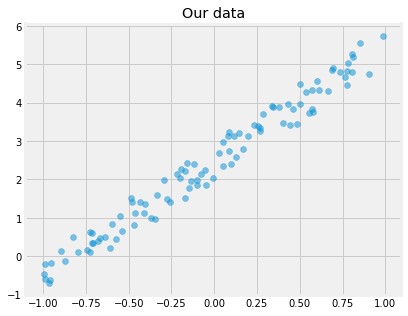

In [8]:
plt.figure(figsize=(6,5))
plt.scatter(x[:,0], y, alpha=.5)
plt.title('Our data')
plt.show()

In [9]:
# Define loss

def mse(y, y_pred) -> torch.tensor:
    return ((y-y_pred)**2).mean()

In [10]:
# Suppose we believe that weights should be:
a = torch.Tensor([-1,1])

In [11]:
mse(y, x@a)

tensor(6.8733)

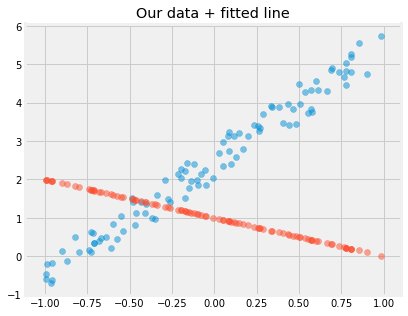

In [12]:
plt.figure(figsize=(6,5))
plt.scatter(x[:,0],y, alpha=.5)
plt.scatter(x[:,0],x@a, alpha=.5)
plt.title('Our data + fitted line')
plt.show()

* ### Gradient Descent

In [13]:
a = torch.tensor([3.,2])

In [14]:
# Set `a` as a parameter vector
a_torch = nn.Parameter(a); a_torch

Parameter containing:
tensor([3., 2.], requires_grad=True)

In [15]:
def update(x, a, y, epoch, learning_rate):
    y_hat = x@a
    loss = mse(y, y_hat)
    if epoch % 10 == 0:
        print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(learning_rate * a.grad)
        a.grad.zero_()

In [16]:
lr = .03
for epoch in range(100):
    update(x,a_torch,y, epoch, lr)

tensor(0.3399, grad_fn=<MeanBackward1>)
tensor(0.1557, grad_fn=<MeanBackward1>)
tensor(0.1023, grad_fn=<MeanBackward1>)
tensor(0.0868, grad_fn=<MeanBackward1>)
tensor(0.0823, grad_fn=<MeanBackward1>)
tensor(0.0809, grad_fn=<MeanBackward1>)
tensor(0.0805, grad_fn=<MeanBackward1>)
tensor(0.0804, grad_fn=<MeanBackward1>)
tensor(0.0803, grad_fn=<MeanBackward1>)
tensor(0.0803, grad_fn=<MeanBackward1>)


In [17]:
a_torch

Parameter containing:
tensor([3.0140, 2.5087], requires_grad=True)

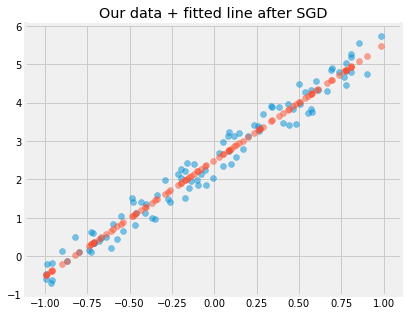

In [18]:
plt.figure(figsize=(6,5))
plt.scatter(x[:,0],y, alpha=.5)
plt.scatter(x[:,0],x@a, alpha=.5)
plt.title('Our data + fitted line after SGD')
plt.show()

* ### Let's animate this!

In [55]:
# Restart parameters
a = nn.Parameter(torch.Tensor([-1,1]))

# Create a fig
fig = plt.figure()
plt.scatter(x[:,0], y, alpha=.5)
line, = plt.plot(x[:,0].numpy(), (x@a).data.numpy(), alpha=.5, color='red')
plt.xlabel('x', alpha=.5)
plt.ylabel('y', alpha=.5)
plt.title('Fitting using SGD')
plt.close()

# Define animation func
def animate_grad(i):
    update(x, a, y, epoch, learning_rate=.06)
    line.set_ydata((x@a).data.numpy())
    return line,

animation.FuncAnimation(fig, animate_grad, np.arange(0, 260), interval=20)

* ### ADD: Matrix multiplication with torch

In [60]:
mtrx1 = torch.Tensor([[1,2,3,4],[4,5,6,7],[7,8,9,10]])

In [61]:
mtrx1

tensor([[ 1.,  2.,  3.,  4.],
        [ 4.,  5.,  6.,  7.],
        [ 7.,  8.,  9., 10.]])

In [62]:
mtrx2 = torch.Tensor([[1,2],[1,2],[1,0],[0,0]])

In [63]:
mtrx2

tensor([[1., 2.],
        [1., 2.],
        [1., 0.],
        [0., 0.]])

In [64]:
# mtrx1@mtrx2 should give :
# [[6, 6],
# [15, 18],
# [24, 30]]
mtrx1@mtrx2

tensor([[ 6.,  6.],
        [15., 18.],
        [24., 30.]])